# Food Desert Investigation -- Exploratory Data Analysis
Hypothesis: Access to grocery stores, specialty food stores, and recreation centers are measures populations with higher education and employment outcomes.

## Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 

In [84]:
df = pd.read_csv('new_clean_combined.csv')

## Initial Review

In [85]:
df.head()

,FIPS,State,County,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,...,WIC_PART_2016,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed
0,1001,AL,autauga,59447.5,31,44,31,3,525930.9601,32.910876,...,129159.9167,55242,414184,343485,7410,58715,157666,36853,162504,50774
1,1003,AL,baldwin,59447.5,118,156,236,29,525930.9601,32.910876,...,129159.9167,207712,414184,343485,7410,58715,157666,36853,162504,50774
2,1005,AL,barbour,59447.5,19,23,14,4,525930.9601,32.910876,...,129159.9167,25819,414184,343485,7410,58715,157666,36853,162504,50774
3,1007,AL,bibb,59447.5,15,7,7,5,525930.9601,32.910876,...,129159.9167,22576,414184,343485,7410,58715,157666,36853,162504,50774
4,1009,AL,blount,59447.5,27,23,12,5,525930.9601,32.910876,...,129159.9167,57517,414184,343485,7410,58715,157666,36853,162504,50774


In [86]:
df.describe()

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,WIC_PART_2016,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,...,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000
mean,30387.632484,129608.522452,40.391083,75.765924,78.621975,20.821975,8.842030e+05,26.956769,2.785856,10.817834,...,2.164955e+05,1.028818e+05,7.709212e+05,272691.833121,49235.972293,3.760988e+05,217874.274841,77881.733121,2.863513e+05,76484.606688
std,15156.372045,154721.098857,97.056911,268.964930,270.112658,90.238333,9.003237e+05,4.398413,0.582904,37.001812,...,2.554410e+05,3.306367e+05,8.067075e+05,239608.317604,92835.992054,7.227860e+05,189556.269947,84311.266970,2.866946e+05,70111.448002
min,1001.000000,7532.750000,0.000000,0.000000,0.000000,0.000000,4.845020e+04,16.722382,1.237415,0.000000,...,1.078283e+04,8.800000e+01,2.052200e+04,0.000000,0.000000,2.420000e+03,12791.000000,3686.000000,1.485200e+04,4139.000000
25%,18178.500000,43433.750000,7.000000,5.000000,7.000000,2.000000,3.767442e+05,23.859642,2.379881,0.000000,...,8.055467e+04,1.095375e+04,2.808670e+05,43244.000000,8264.000000,4.965100e+04,85786.000000,23605.000000,1.029990e+05,26868.000000
50%,29176.000000,71045.000000,15.000000,15.000000,18.000000,5.000000,5.986653e+05,26.713016,2.689100,2.000000,...,1.275510e+05,2.575800e+04,4.898120e+05,199927.000000,23847.000000,1.015880e+05,158470.000000,44745.000000,1.916300e+05,51769.000000
75%,45079.500000,127954.500000,35.250000,45.000000,48.250000,12.000000,1.013673e+06,30.887988,3.065642,6.000000,...,2.347192e+05,6.736150e+04,8.214960e+05,458785.000000,46660.000000,2.287320e+05,286946.000000,88578.000000,3.479850e+05,109218.000000
max,56045.000000,595088.250000,2199.000000,8264.000000,8113.000000,2495.000000,3.377166e+06,35.633484,4.030984,939.000000,...,1.174875e+06,1.012054e+07,2.962647e+06,727850.000000,624499.000000,2.872144e+06,773071.000000,439167.000000,1.233501e+06,353021.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FIPS                      3140 non-null   int64  
 1   State                     3140 non-null   object 
 2   County                    3140 non-null   object 
 3   CACFP_PART_2016           3140 non-null   float64
 4   CONVS16                   3140 non-null   int64  
 5   FFR16                     3140 non-null   int64  
 6   FSR16                     3140 non-null   int64  
 7   GROC16                    3140 non-null   int64  
 8   NSLP_PART_2016            3140 non-null   float64
 9   PCT_WICINFANTCHILD16      3140 non-null   float64
 10  PCT_WICWOMEN16            3140 non-null   float64
 11  RECFAC16                  3140 non-null   int64  
 12  REDEMP_WICS16             3140 non-null   float64
 13  SBP_PART_2016             3140 non-null   float64
 14  SFSP_PAR

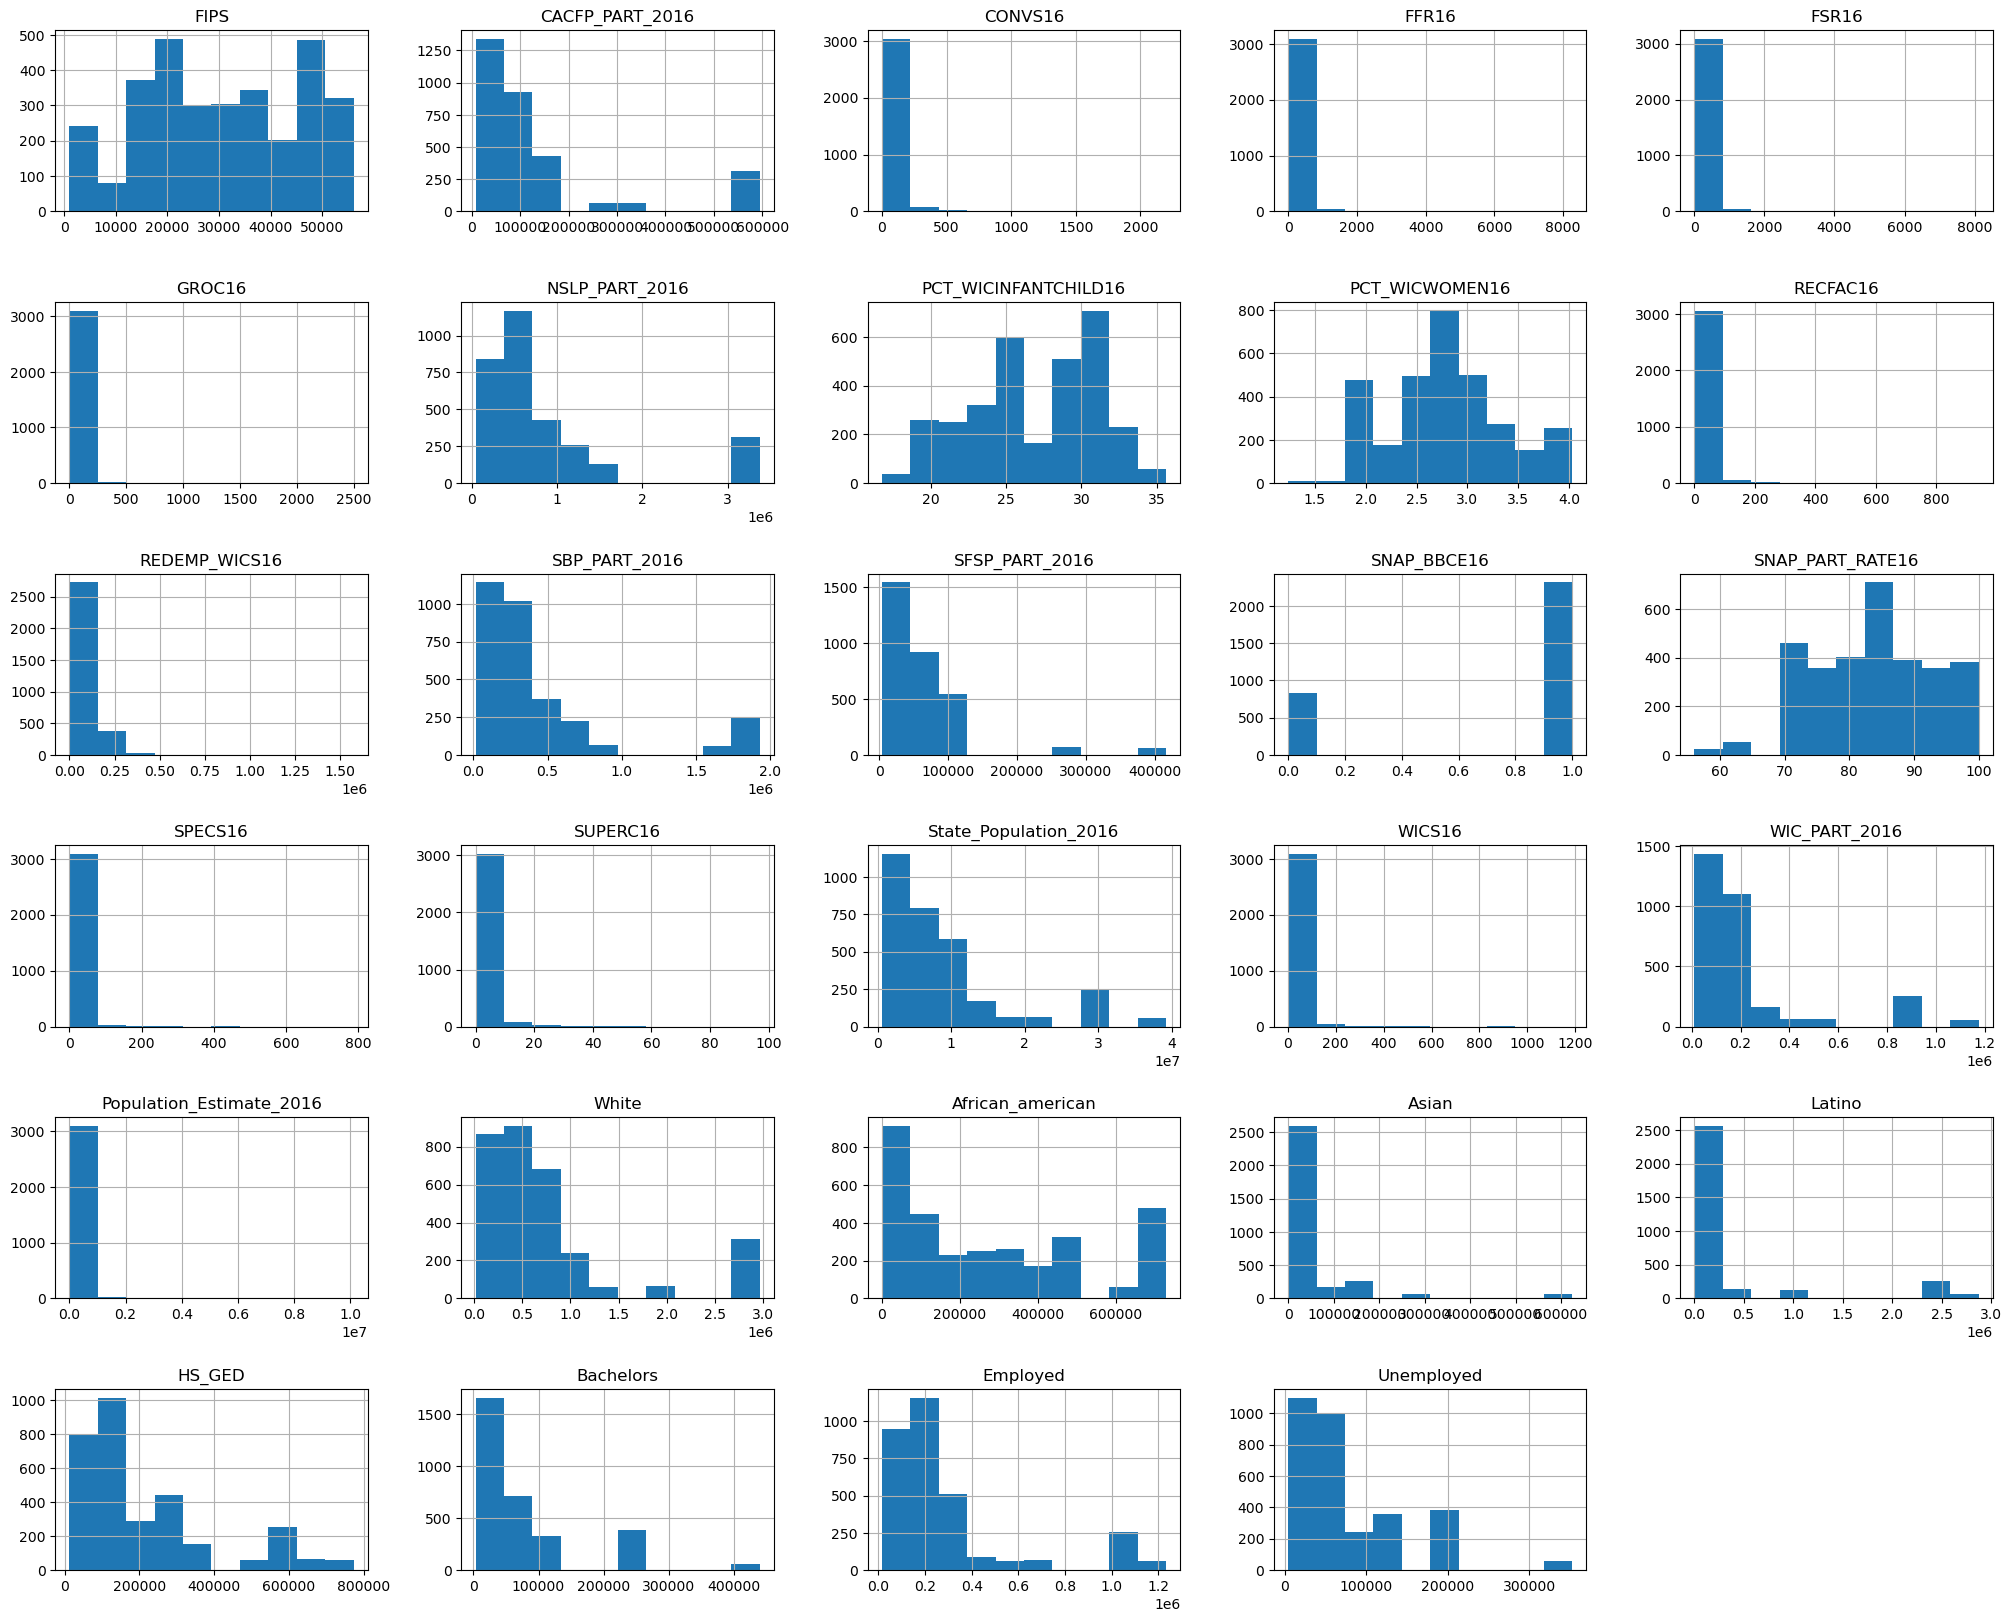

In [88]:
df.hist(figsize = (25,20))
plt.subplots_adjust(hspace=0.5);

### Comparisons using .describe()

In [89]:
# Grocery stores
df['GROC16'].describe()

count    3140.000000
mean       20.821975
std        90.238333
min         0.000000
25%         2.000000
50%         5.000000
75%        12.000000
max      2495.000000
Name: GROC16, dtype: float64

In [90]:
# Fast food restaurants
df['FFR16'].describe()

count    3140.000000
mean       75.765924
std       268.964930
min         0.000000
25%         5.000000
50%        15.000000
75%        45.000000
max      8264.000000
Name: FFR16, dtype: float64

In [91]:
# Full service restaurants
df['FSR16'].describe()

count    3140.000000
mean       78.621975
std       270.112658
min         0.000000
25%         7.000000
50%        18.000000
75%        48.250000
max      8113.000000
Name: FSR16, dtype: float64

In [92]:
# Specialty food stores
df['SPECS16'].describe()

count    3140.000000
mean        7.465287
std        29.710846
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       787.000000
Name: SPECS16, dtype: float64

## Correlation

In [93]:
corr = df.corr(numeric_only=True)
corr

,FIPS,CACFP_PART_2016,CONVS16,FFR16,FSR16,GROC16,NSLP_PART_2016,PCT_WICINFANTCHILD16,PCT_WICWOMEN16,RECFAC16,...,WIC_PART_2016,Population_Estimate_2016,White,African_american,Asian,Latino,HS_GED,Bachelors,Employed,Unemployed
FIPS,1.000000,0.138808,-0.039808,-0.050899,-0.051057,-0.034344,0.154191,-0.158109,-0.033347,-0.048643,...,0.104945,-0.055889,0.159569,-0.013164,-0.068917,0.149490,0.073880,0.008266,0.113478,0.025714
CACFP_PART_2016,0.138808,1.000000,0.167380,0.160561,0.160835,0.141671,0.987134,0.483234,0.599480,0.146159,...,0.987407,0.171589,0.977946,0.715693,0.754103,0.976699,0.935827,0.920477,0.983043,0.918684
CONVS16,-0.039808,0.167380,1.000000,0.909071,0.869200,0.700631,0.156429,0.119928,0.035911,0.873456,...,0.181995,0.928044,0.166971,0.160575,0.211195,0.156429,0.209714,0.232068,0.182833,0.219181
FFR16,-0.050899,0.160561,0.909071,1.000000,0.975937,0.835600,0.142968,0.088758,0.008151,0.952760,...,0.179225,0.988938,0.149514,0.108951,0.259166,0.158428,0.185846,0.232445,0.172902,0.212828
FSR16,-0.051057,0.160835,0.869200,0.975937,1.000000,0.843935,0.138826,0.085256,-0.010093,0.966063,...,0.178198,0.956397,0.147896,0.104684,0.270647,0.157590,0.189239,0.243707,0.172120,0.215502
GROC16,-0.034344,0.141671,0.700631,0.835600,0.843935,1.000000,0.114454,0.072604,-0.018350,0.778108,...,0.146109,0.818377,0.116335,0.105763,0.249273,0.123400,0.167299,0.217842,0.142680,0.188864
NSLP_PART_2016,0.154191,0.987134,0.156429,0.142968,0.138826,0.114454,1.000000,0.457460,0.592878,0.126255,...,0.980663,0.153806,0.984239,0.758776,0.700645,0.960207,0.940348,0.897482,0.986737,0.918607
PCT_WICINFANTCHILD16,-0.158109,0.483234,0.119928,0.088758,0.085256,0.072604,0.457460,1.000000,0.831795,0.062911,...,0.509411,0.099310,0.487152,0.464049,0.362727,0.448391,0.517621,0.434470,0.480219,0.492782
PCT_WICWOMEN16,-0.033347,0.599480,0.035911,0.008151,-0.010093,-0.018350,0.592878,0.831795,1.000000,-0.030186,...,0.587770,0.012669,0.592059,0.485917,0.253932,0.595482,0.522505,0.401894,0.557047,0.460583
RECFAC16,-0.048643,0.146159,0.873456,0.952760,0.966063,0.778108,0.126255,0.062911,-0.030186,1.000000,...,0.162750,0.938824,0.133675,0.092750,0.251196,0.144361,0.172860,0.226384,0.156442,0.198738


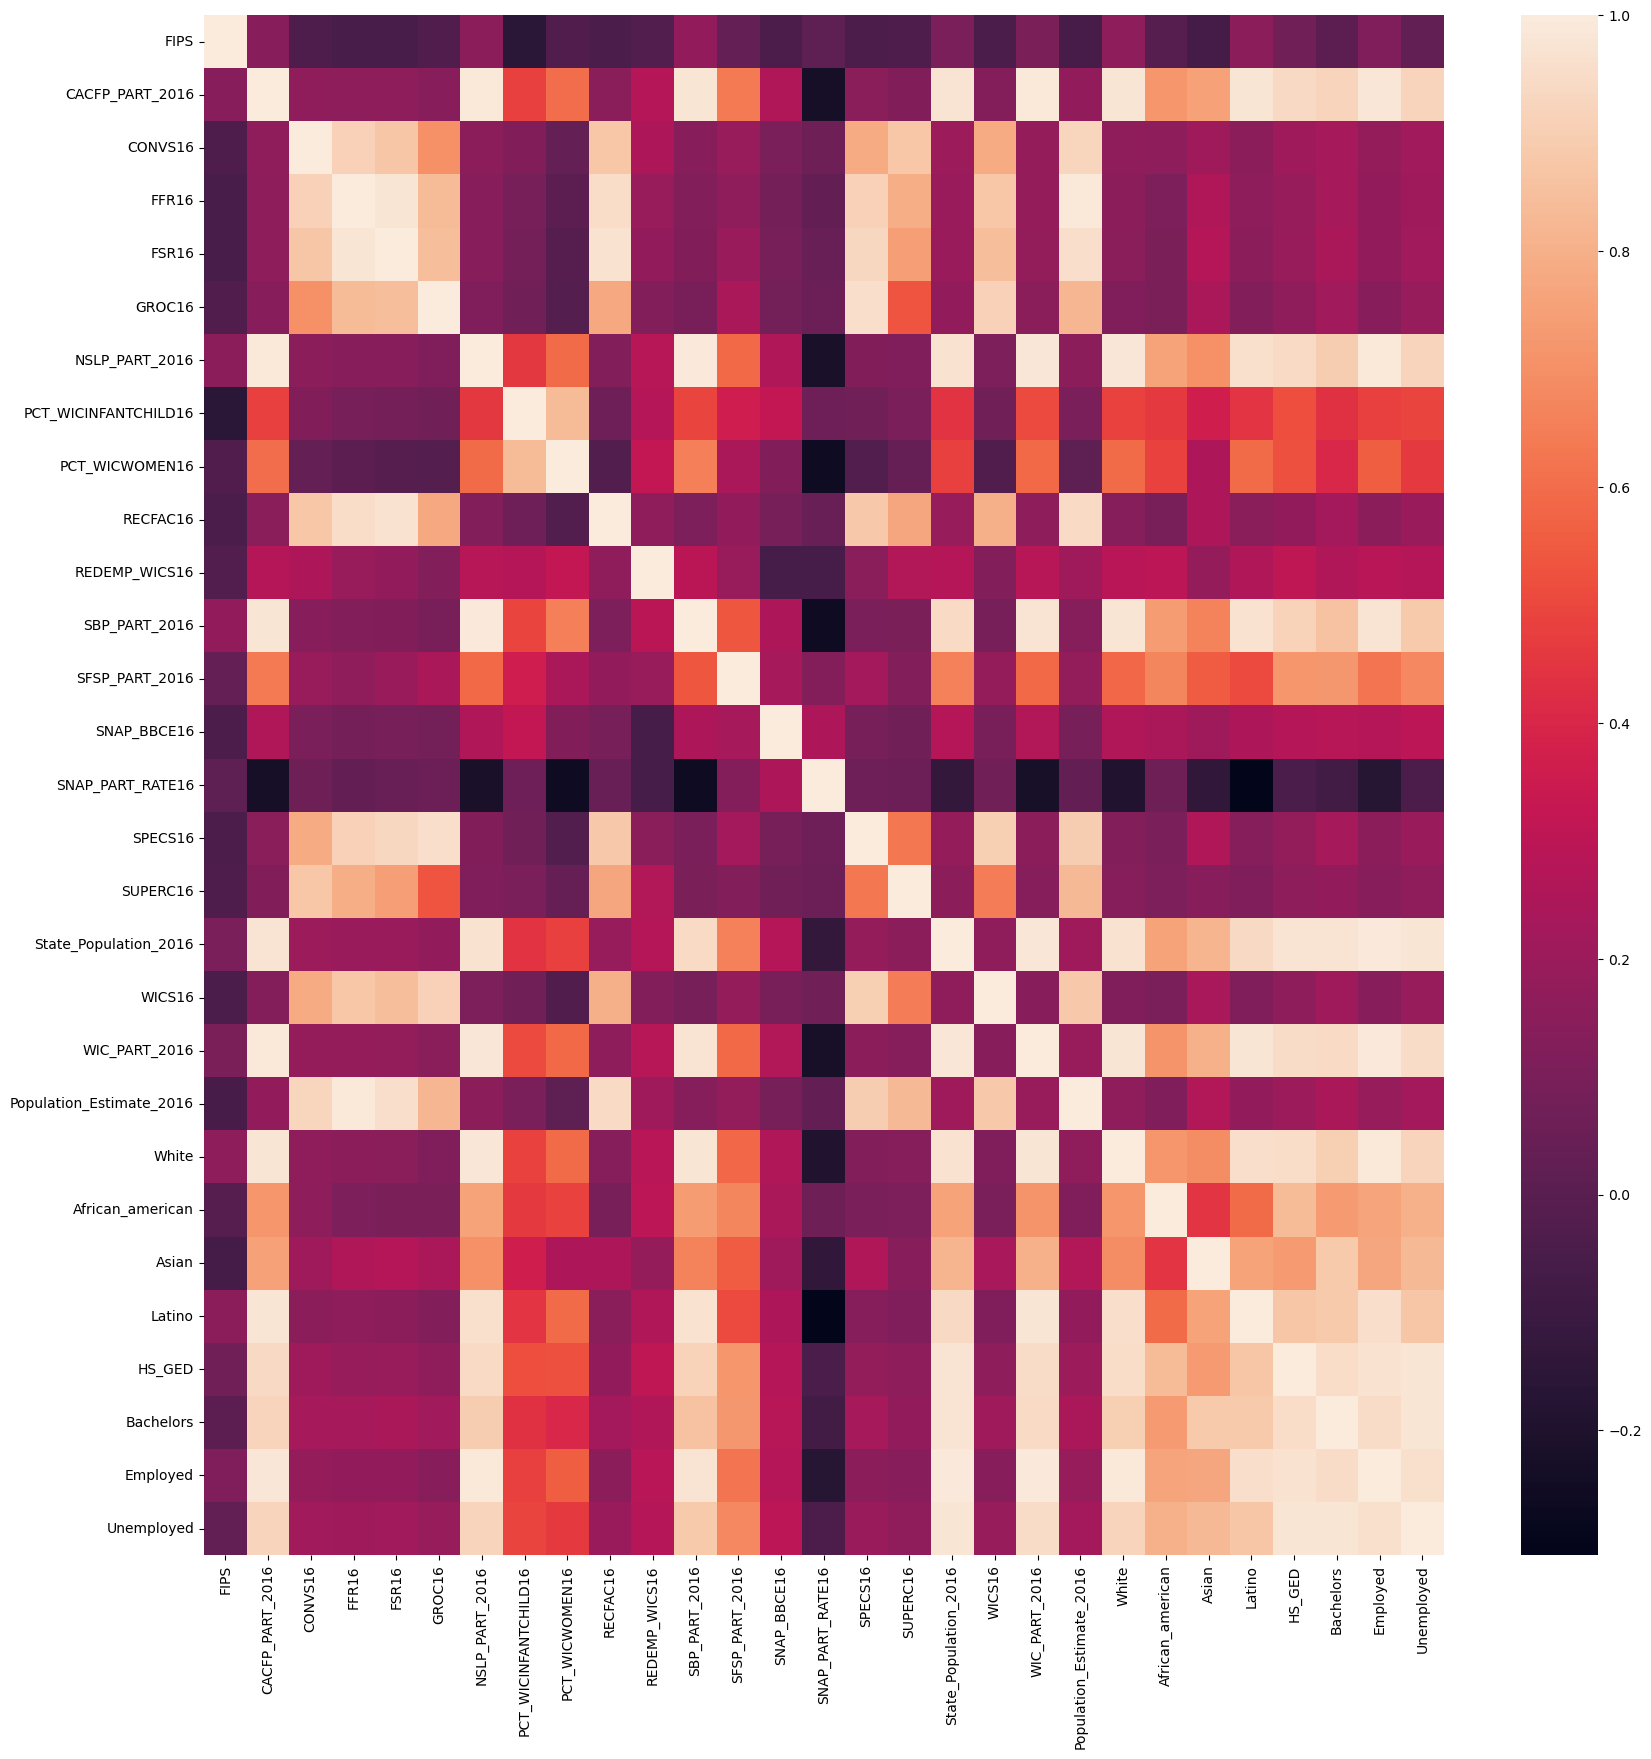

In [94]:
plt.figure(figsize=(20,20))
_ = sns.heatmap(df.corr(numeric_only=True), annot=False)
plt.show()

Correlation -- Sorted (Absolute Value)

In [95]:
abs_corr = corr.abs()

In [96]:
s = abs_corr.unstack()
so = s.sort_values(kind='quicksort', ascending=False)
so = so[so > 0.6]
so = so[so < 1.0]

In [97]:
sorted_correlation = pd.DataFrame(so)
sorted_correlation.head()

,,0
SBP_PART_2016,NSLP_PART_2016,0.992469
NSLP_PART_2016,SBP_PART_2016,0.992469
WIC_PART_2016,Employed,0.992069
Employed,WIC_PART_2016,0.992069
State_Population_2016,Employed,0.991725


In [98]:
#plt.figure(figsize=(20,20))
#_ = sns.heatmap(sorted_correlation, annot=False)
#plt.ylabel('Correlation of Column Variables')
#plt.show()

## Examining Variables

### Bar plots

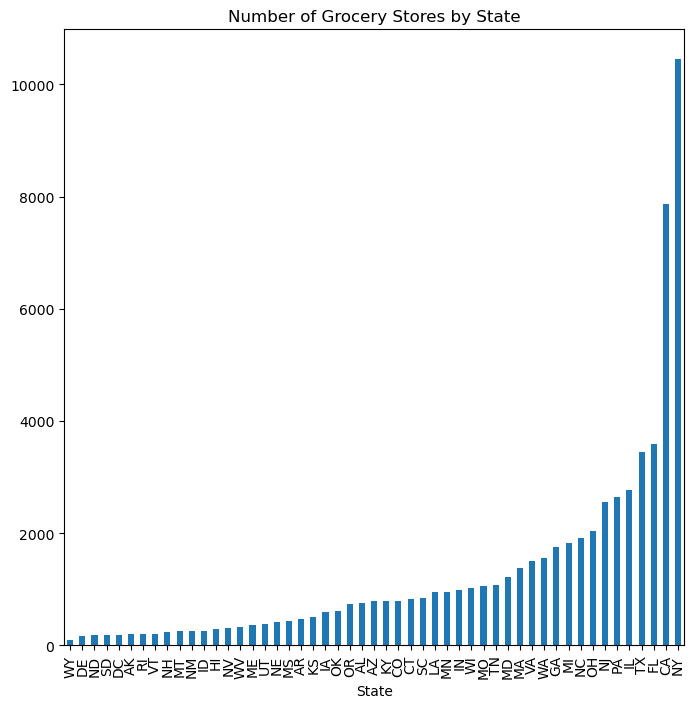

In [99]:
plt.figure(figsize=(8,8))
groc_by_state = df.groupby("State")['GROC16'].sum().sort_values(ascending=True)
_ = groc_by_state.plot(kind="bar", title="Number of Grocery Stores by State")
plt.show()

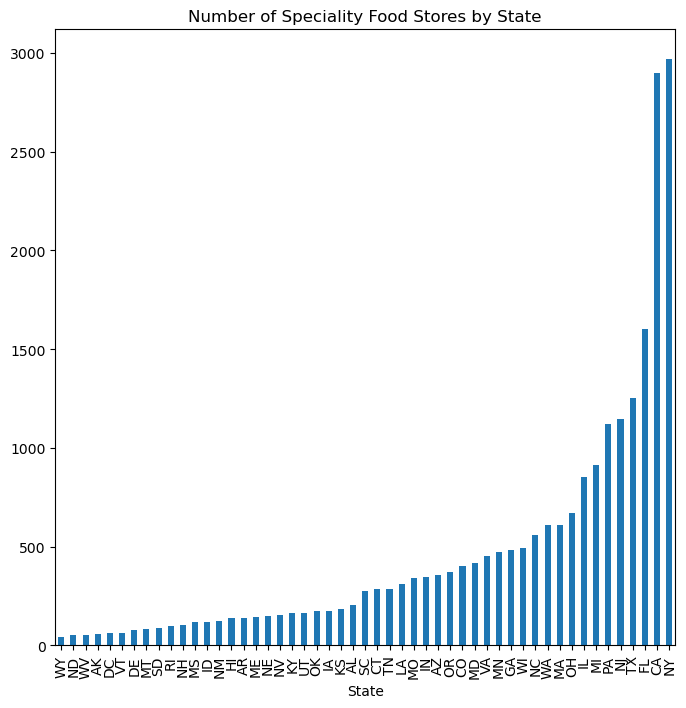

In [101]:
plt.figure(figsize=(8,8))
spec_by_state = df.groupby("State")['SPECS16'].sum().sort_values(ascending=True)
spec_by_state.plot(kind="bar", title="Number of Speciality Food Stores by State")
plt.show()

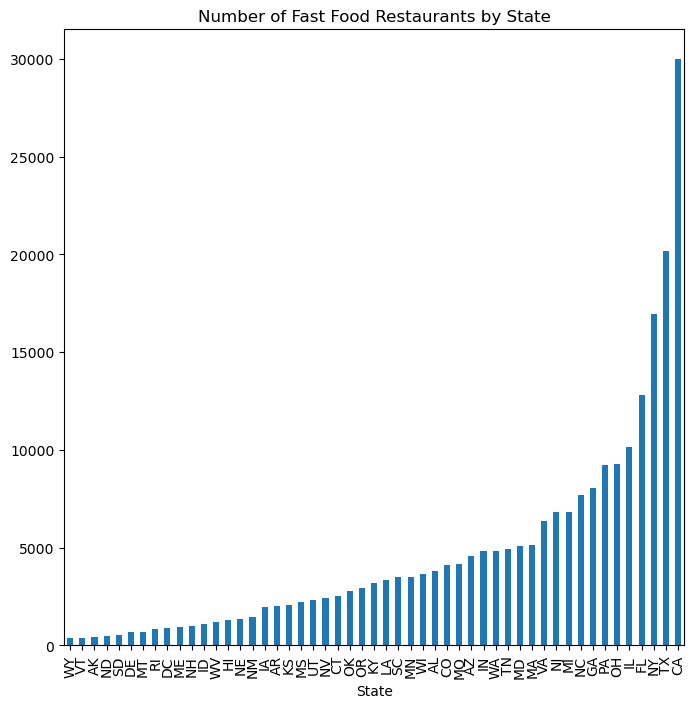

In [102]:
plt.figure(figsize=(8,8))
ff_by_state = df.groupby("State")['FFR16'].sum().sort_values(ascending=True)
ff_by_state.plot(kind="bar", title="Number of Fast Food Restaurants by State")
plt.show()

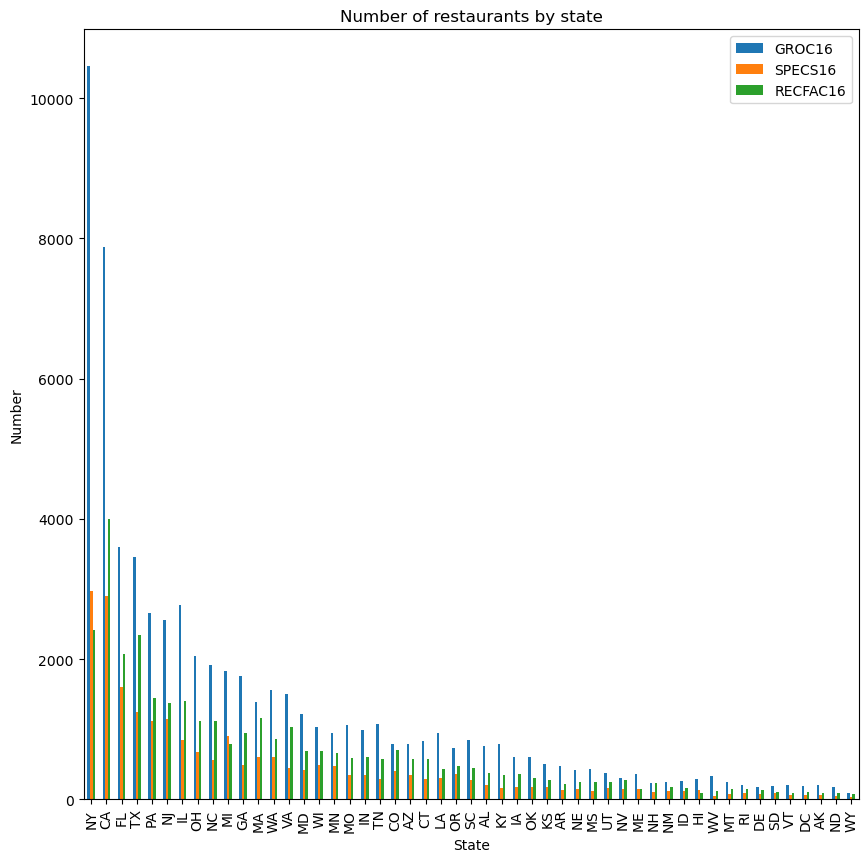

In [100]:
#plt.figure(figsize=(20,20))
groc_pop = df.groupby('State')[['GROC16','SPECS16','RECFAC16']].sum()
(groc_pop.reindex(index=groc_pop.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Number of restaurants by state'))
plt.xlabel('State')
plt.ylabel('Number');

In [103]:
restaurants_by_state = df.groupby('State')[['FFR16','FSR16']].sum()
restaurants_by_state.head()

,FFR16,FSR16
State,,
AK,421,578
AL,3822,2821
AR,2014,2015
AZ,4585,4157
CA,29995,30798


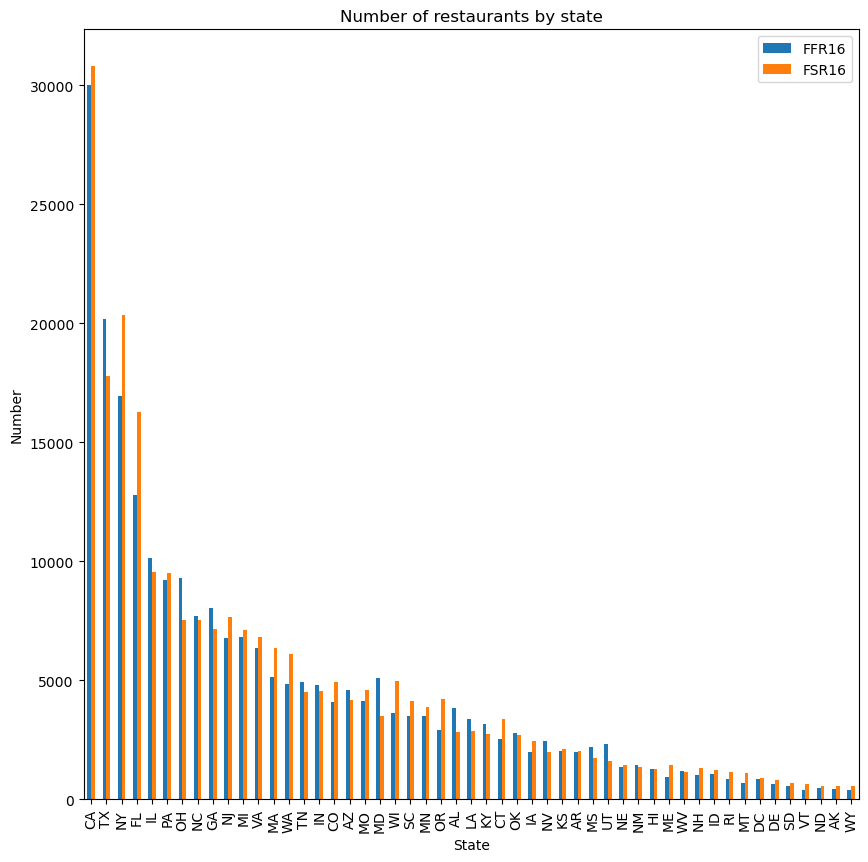

In [104]:
#plt.figure(figsize=(20,20))
(restaurants_by_state.reindex(index=restaurants_by_state.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Number of restaurants by state'))
plt.xlabel('State')
plt.ylabel('Number');

### Scatter plots

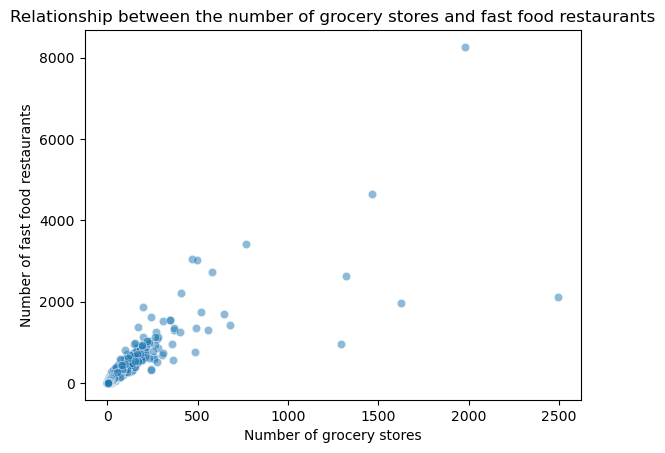

In [105]:
# Plot number of grocery stores against number of fast food restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='FFR16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of fast food restaurants')
_ = plt.title("Relationship between the number of grocery stores and fast food restaurants")
plt.show()

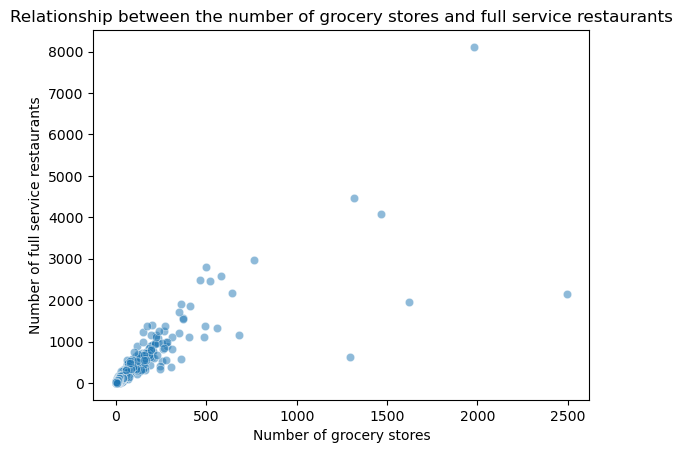

In [106]:
# Plot number of grocery stores against number of full-service restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='FSR16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of full service restaurants')
_ = plt.title("Relationship between the number of grocery stores and full service restaurants")
plt.show()

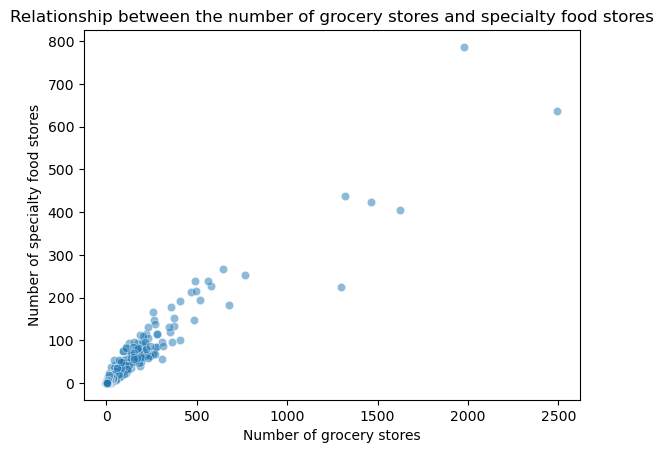

In [107]:
# Plot number of grocery stores against number of full-service restaurants
_ = sns.scatterplot(data=df, x='GROC16', y='SPECS16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of specialty food stores')
_ = plt.title("Relationship between the number of grocery stores and specialty food stores")
plt.show()

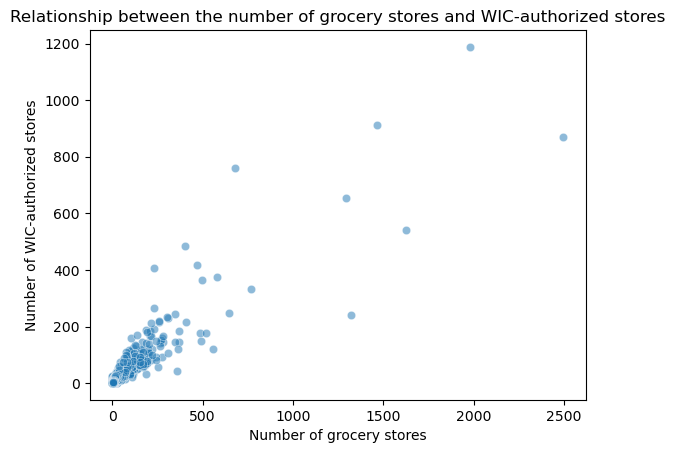

In [108]:
# Plot number of grocery stores against number of WIC-authorized stores
_ = sns.scatterplot(data=df, x='GROC16', y='WICS16', alpha=0.5)
_ = plt.xlabel('Number of grocery stores')
_ = plt.ylabel('Number of WIC-authorized stores')
_ = plt.title("Relationship between the number of grocery stores and WIC-authorized stores")
plt.show()

<Axes: xlabel='GROC16', ylabel='SPECS16'>

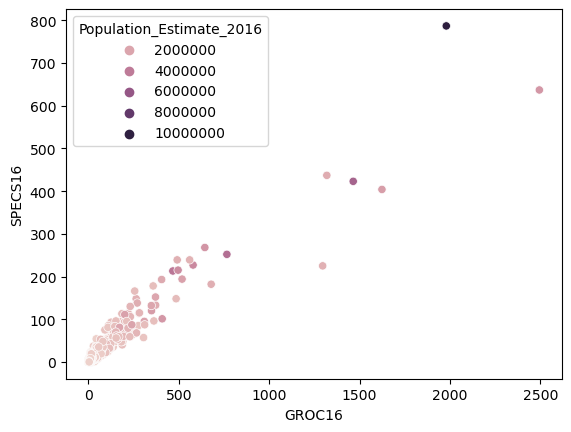

In [109]:
sns.scatterplot(x='GROC16', y='SPECS16', data=df, hue='Population_Estimate_2016')

<Axes: xlabel='Population_Estimate_2016', ylabel='Bachelors'>

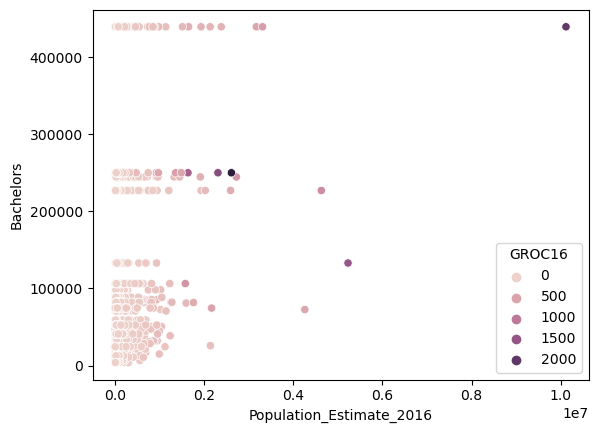

In [110]:
sns.scatterplot(x='Population_Estimate_2016', y='Bachelors', data=df, hue='GROC16')

<Axes: xlabel='Population_Estimate_2016', ylabel='Employed'>

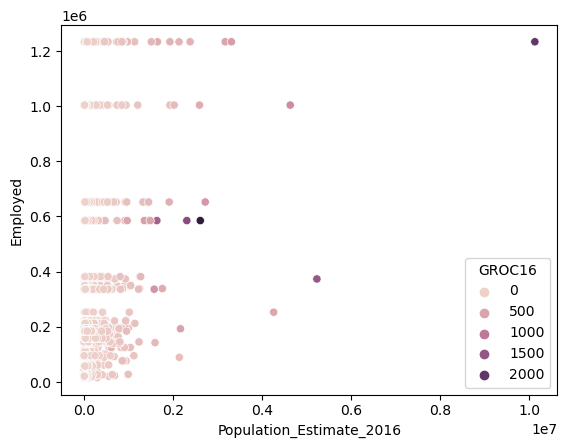

In [111]:
sns.scatterplot(x='Population_Estimate_2016', y='Employed', data=df, hue='GROC16')

### Box plots

<function matplotlib.pyplot.show(close=None, block=None)>

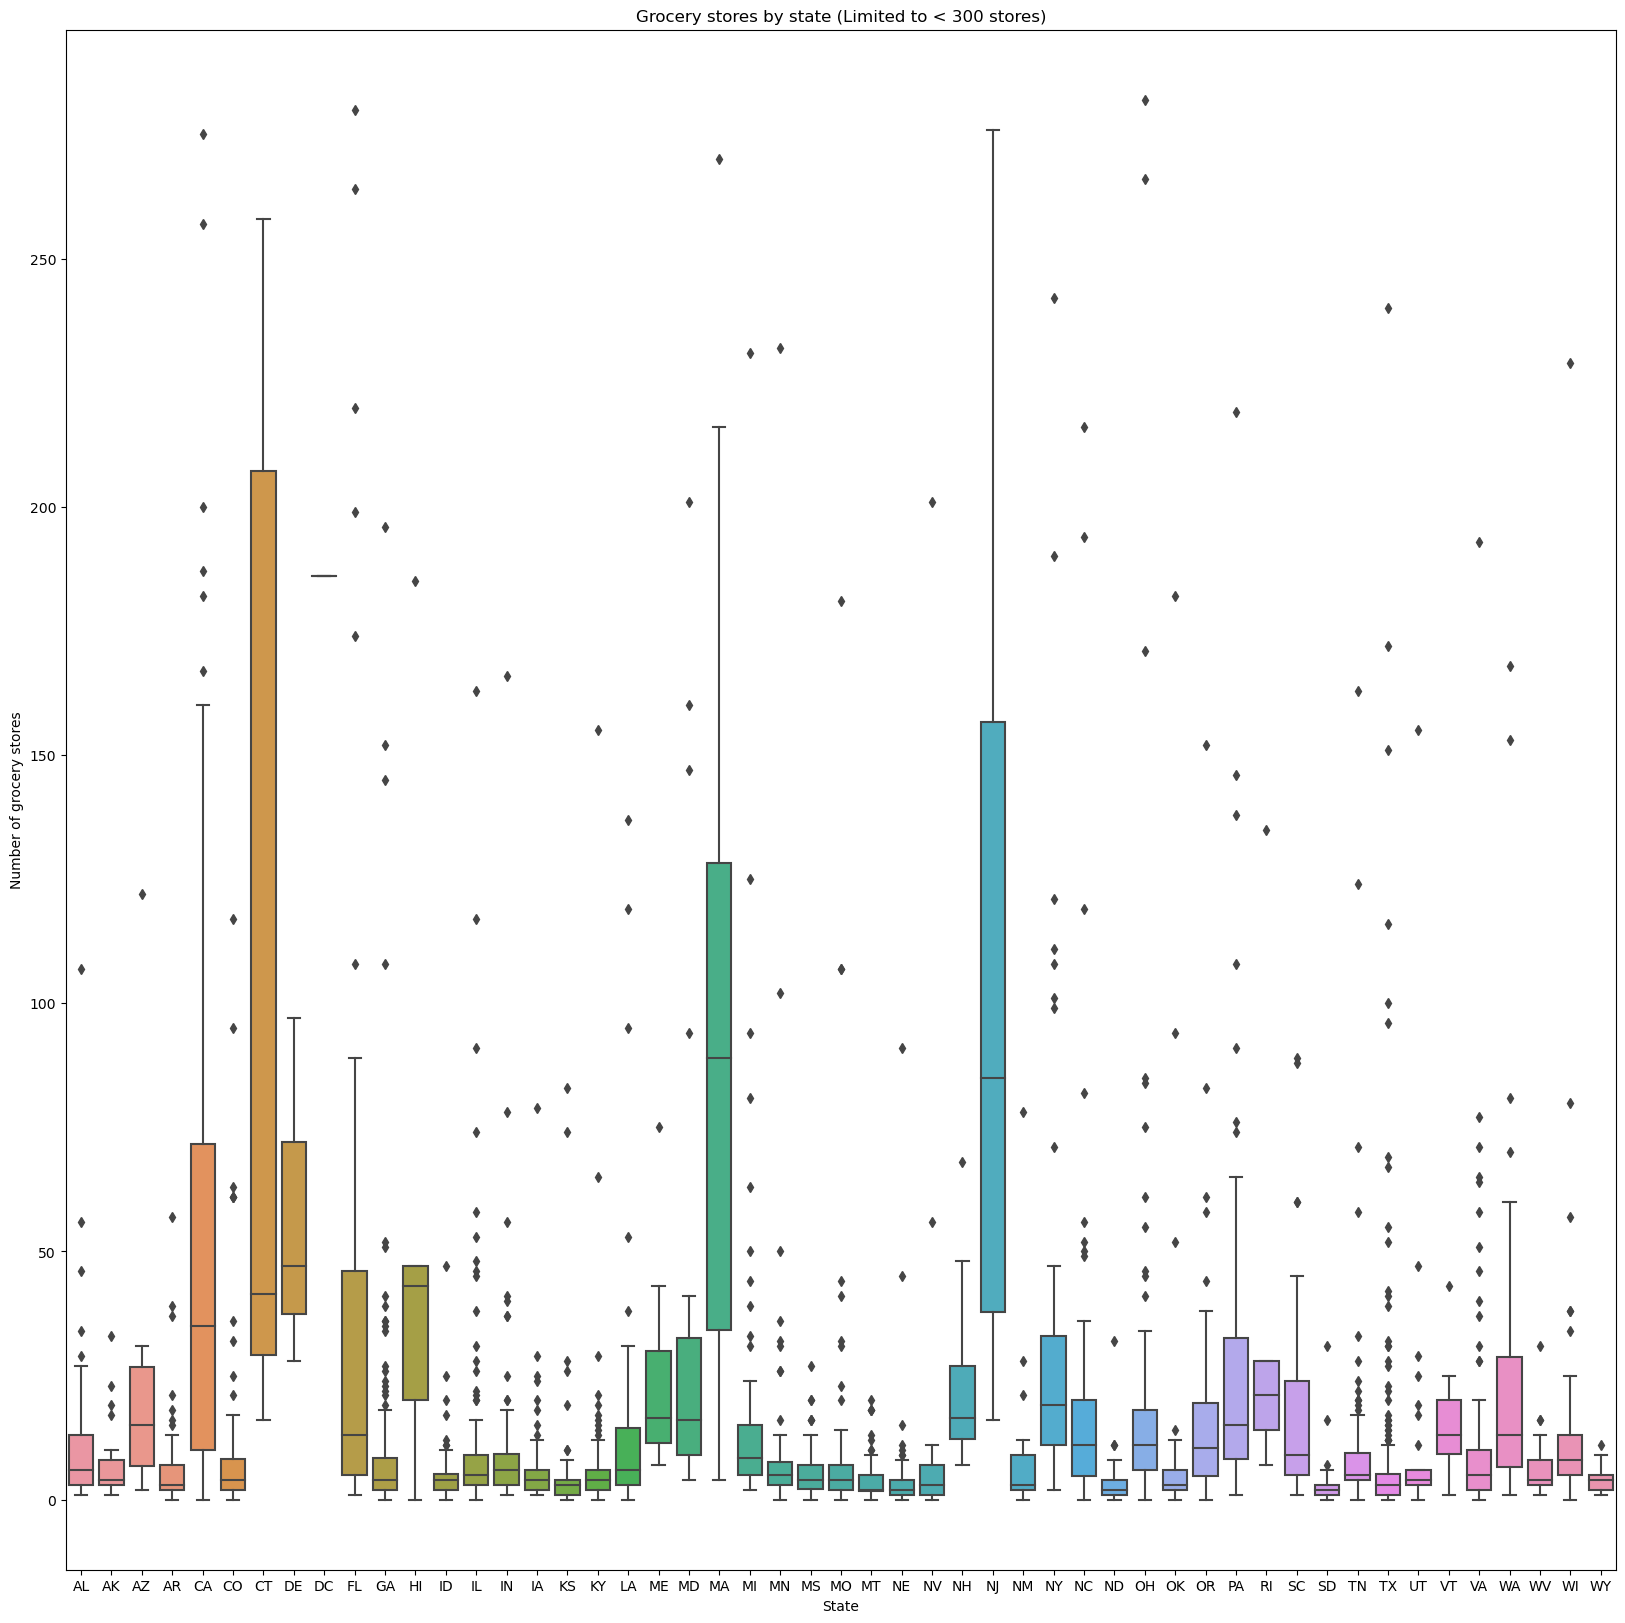

In [112]:
plt.figure(figsize=(20,20))
_ = sns.boxplot(x='State',y='GROC16',data=df.query('GROC16 < 300'))
_ = plt.xlabel('State')
_ = plt.ylabel('Number of grocery stores')
_ = plt.title('Grocery stores by state (Limited to < 300 stores)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

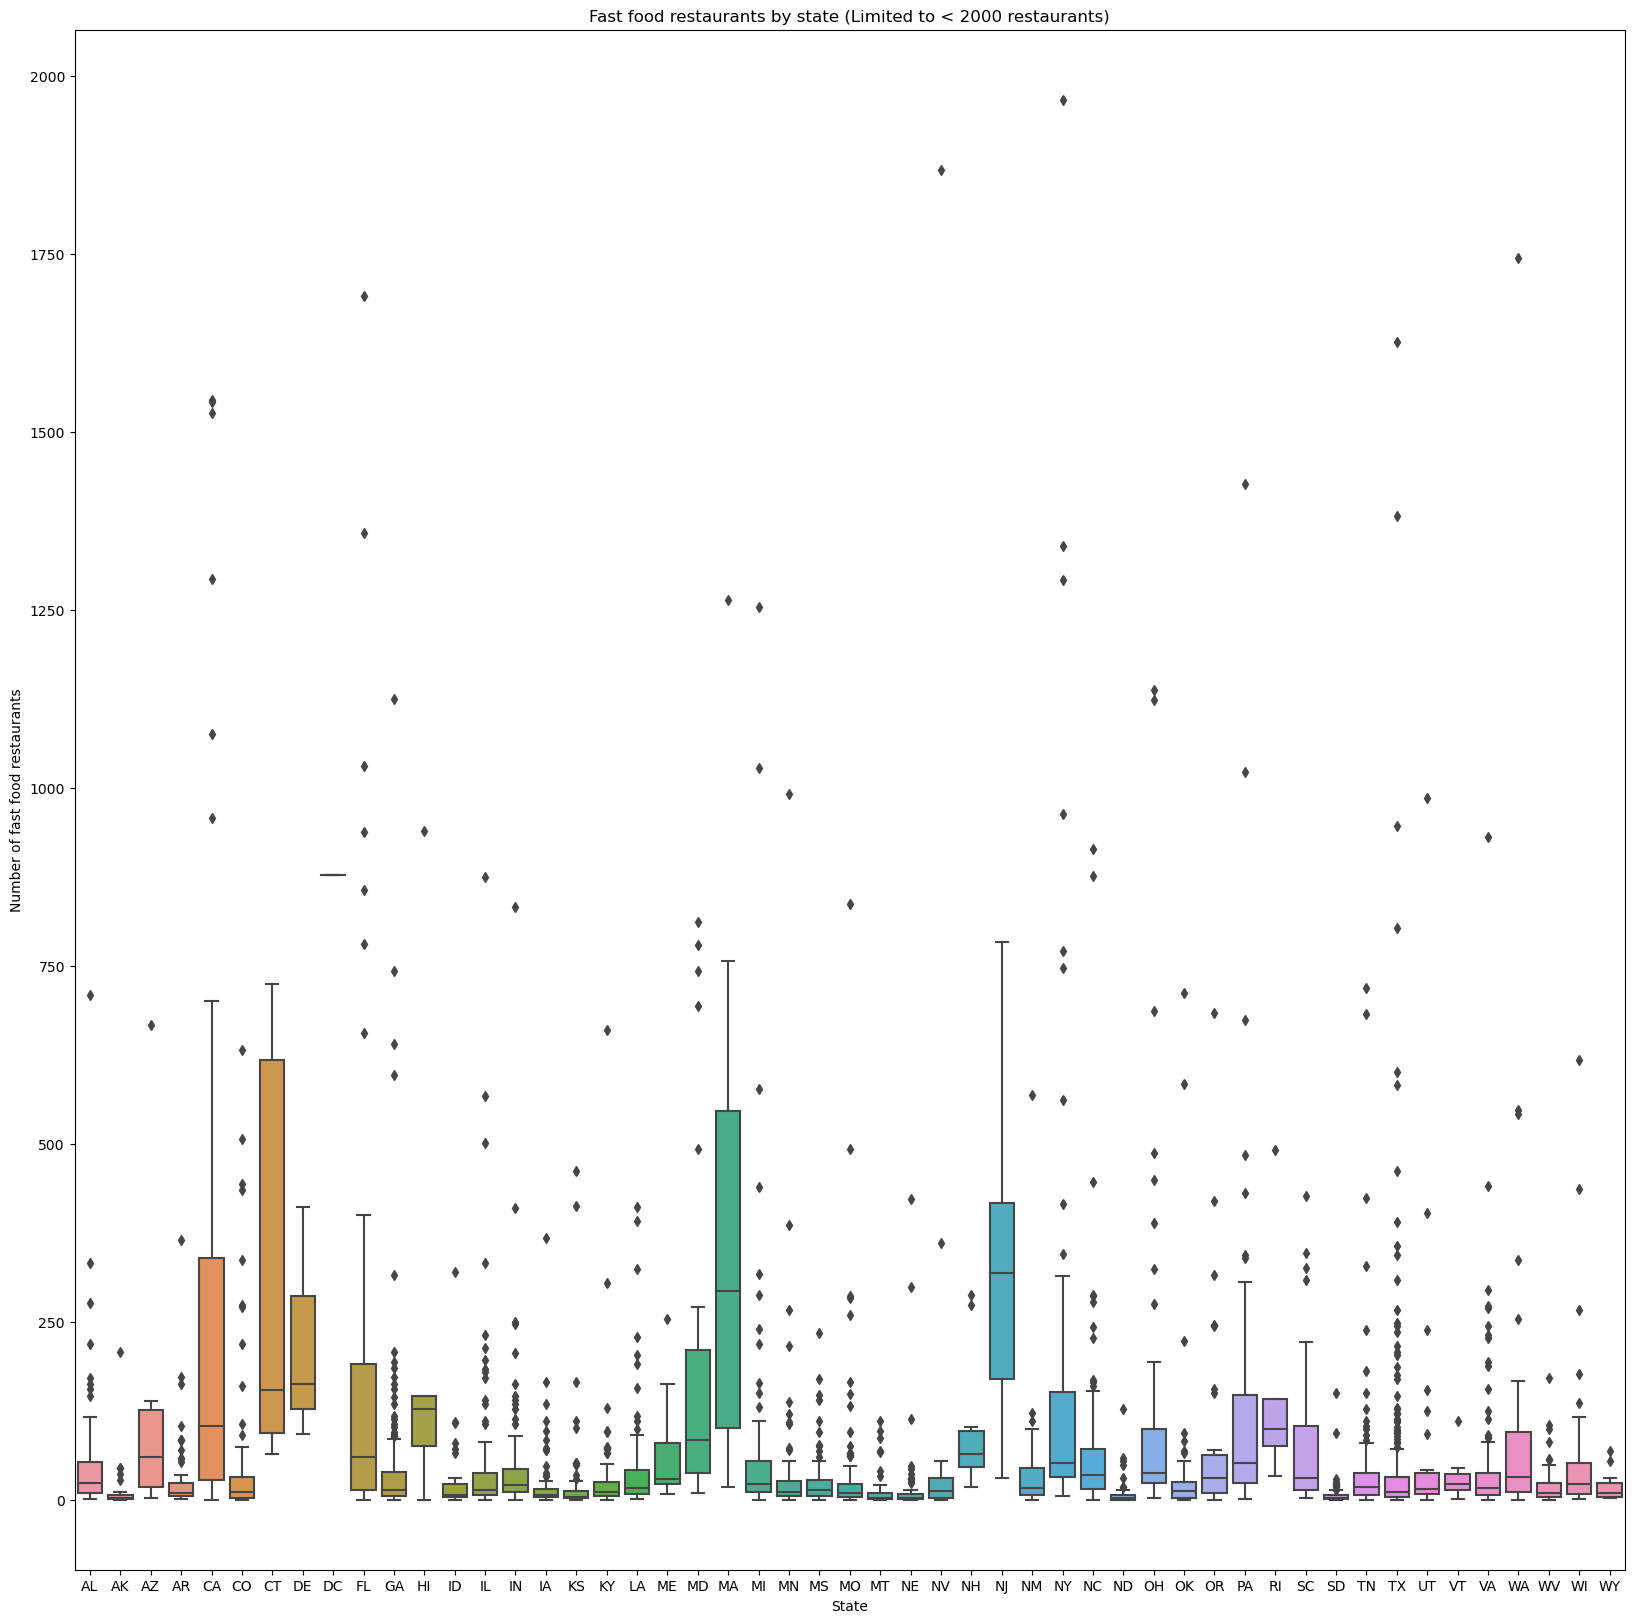

In [113]:
plt.figure(figsize=(20,20))
_ = sns.boxplot(x='State',y='FFR16',data=df.query('FFR16 < 2000'))
_ = plt.xlabel('State')
_ = plt.ylabel('Number of fast food restaurants')
_ = plt.title('Fast food restaurants by state (Limited to < 2000 restaurants)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

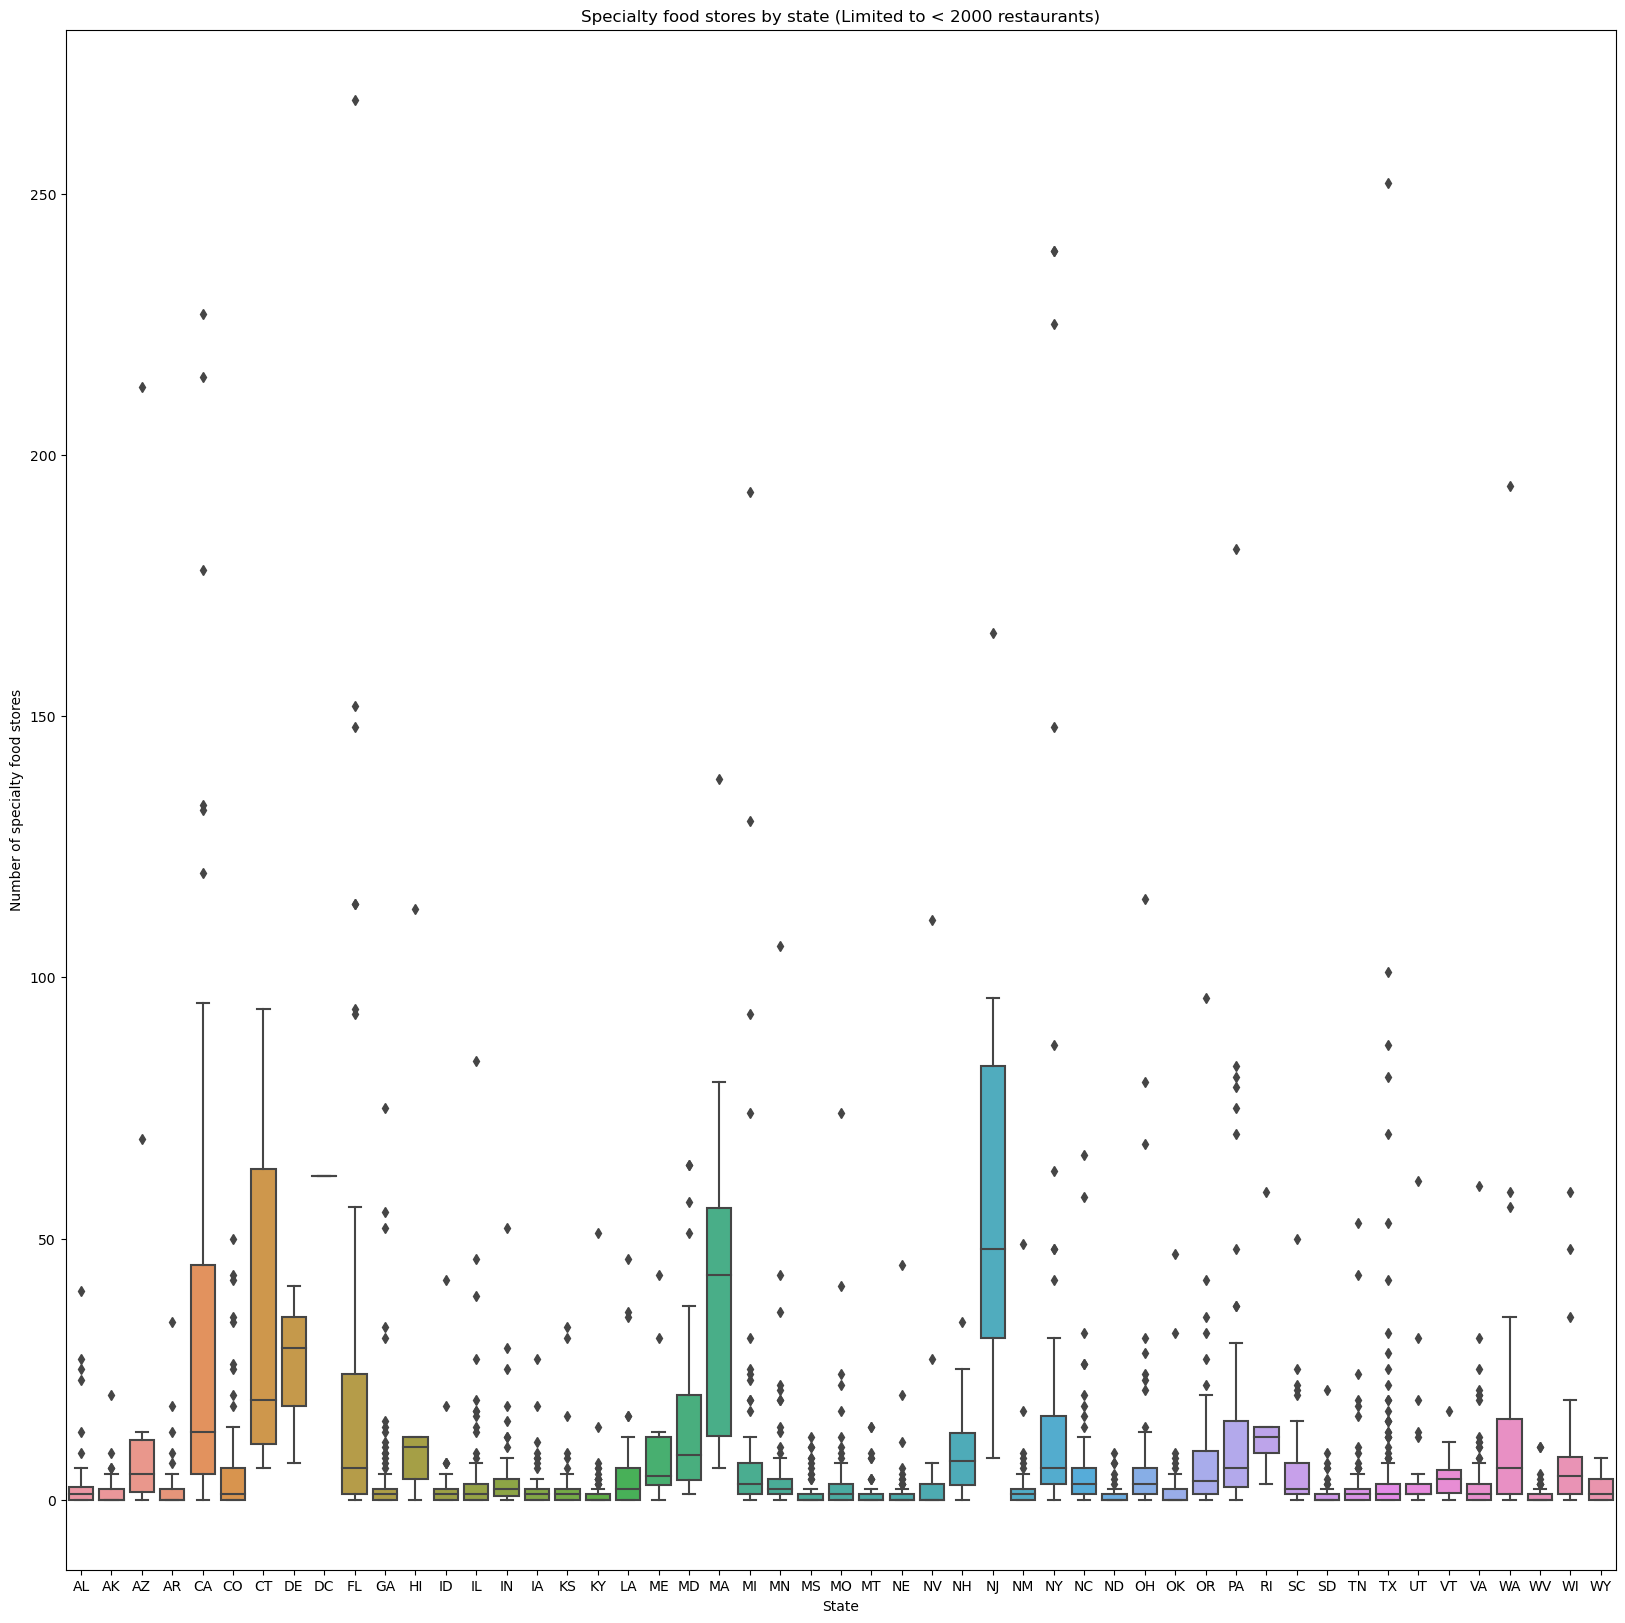

In [114]:
plt.figure(figsize=(20,20))
_ = sns.boxplot(x='State',y='SPECS16',data=df.query('SPECS16 < 300'))
_ = plt.xlabel('State')
_ = plt.ylabel('Number of specialty food stores')
_ = plt.title('Specialty food stores by state (Limited to < 2000 restaurants)')
plt.show